Using device: cpu

Processing: sample_1.jpg


### Results for sample_1.jpg

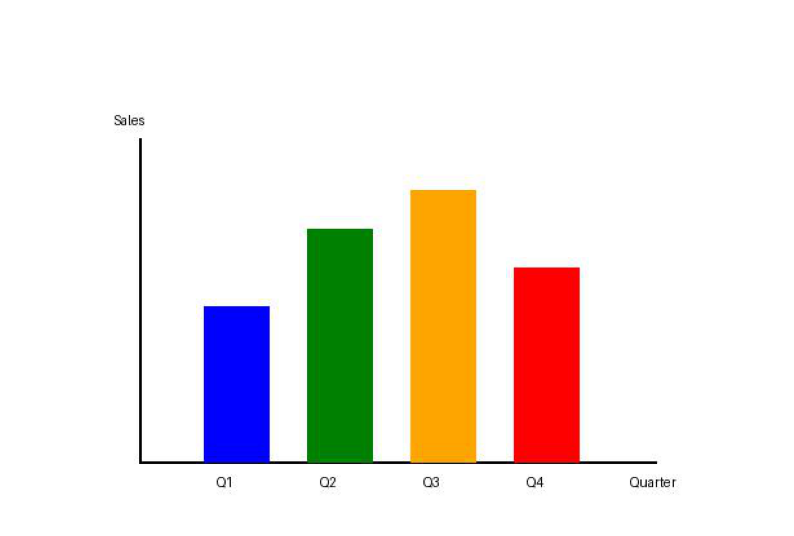

#### Context Used:

```
Section: Performance Metrics
Caption: Figure 2: Quarterly sales performance
Context: Our quarterly performance is visualized in the chart below.
```

#### Generated Captions:

- **Short Caption** (0.95 confidence): *brief caption for this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

- **Detailed Caption** (0.94 confidence): *detailed description of this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

Saved annotated image to: Jupyter Notebook/yavar/output_folder\annotated_sample_1.jpg
Saved captions to: Jupyter Notebook/yavar/output_folder\captions_sample_1.json

Processing: sample_2.jpg


### Results for sample_2.jpg

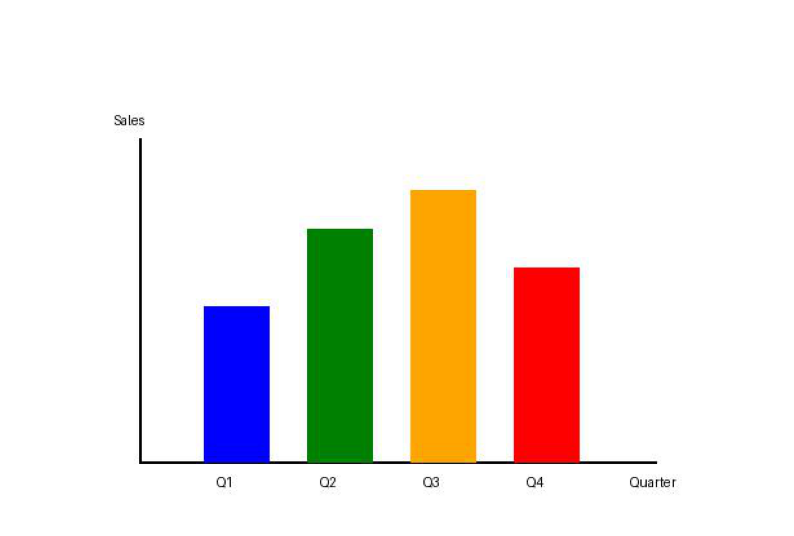

#### Context Used:

```
Section: Performance Metrics
Caption: Figure 2: Quarterly sales performance
Context: Our quarterly performance is visualized in the chart below.
```

#### Generated Captions:

- **Short Caption** (0.95 confidence): *brief caption for this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

- **Detailed Caption** (0.94 confidence): *detailed description of this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

Saved annotated image to: Jupyter Notebook/yavar/output_folder\annotated_sample_2.jpg
Saved captions to: Jupyter Notebook/yavar/output_folder\captions_sample_2.json

Processing: sample_3.jpg


### Results for sample_3.jpg

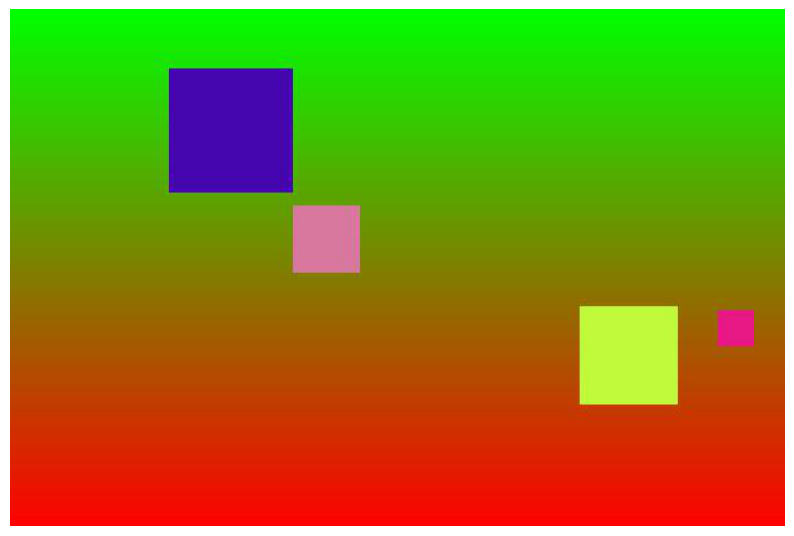

#### Context Used:

```
Section: Product Showcase
Caption: Photo 3: New product collection
Context: Our latest product lineup is displayed below.
```

#### Generated Captions:

- **Short Caption** (0.95 confidence): *brief caption for this image. context : section : product showcase caption : photo 3 : new product collection context : our latest product lineup is displayed below.*

- **Detailed Caption** (0.71 confidence): *detailed description of this image. context : section : product showcase caption : photo 3 : new product collection context : our latest product lineup is displayed below.*

Saved annotated image to: Jupyter Notebook/yavar/output_folder\annotated_sample_3.jpg
Saved captions to: Jupyter Notebook/yavar/output_folder\captions_sample_3.json

Processing: sample_4.jpg


### Results for sample_4.jpg

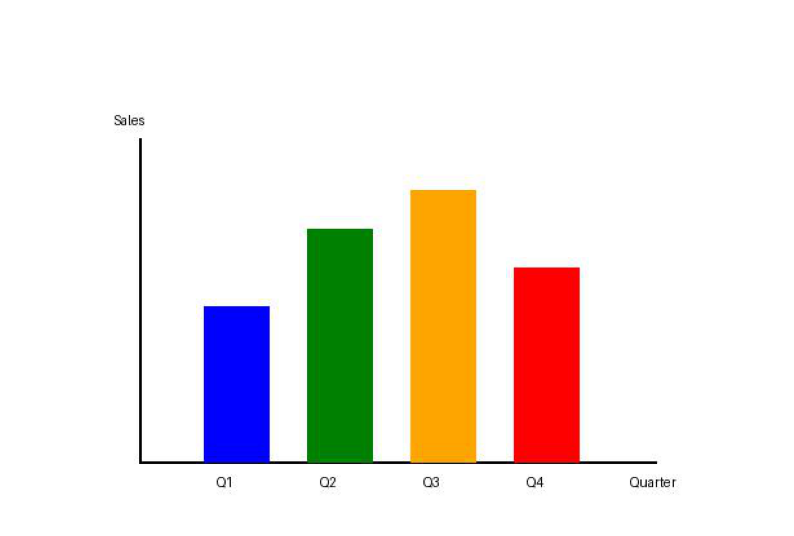

#### Context Used:

```
Section: Performance Metrics
Caption: Figure 2: Quarterly sales performance
Context: Our quarterly performance is visualized in the chart below.
```

#### Generated Captions:

- **Short Caption** (0.95 confidence): *brief caption for this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

- **Detailed Caption** (0.94 confidence): *detailed description of this image. context : section : performance metrics caption : figure 2 : quarterly sales performance context : our quarterly performance is visualized in the chart below.*

Saved annotated image to: Jupyter Notebook/yavar/output_folder\annotated_sample_4.jpg
Saved captions to: Jupyter Notebook/yavar/output_folder\captions_sample_4.json

Processing: sample_5.jpg


### Results for sample_5.jpg

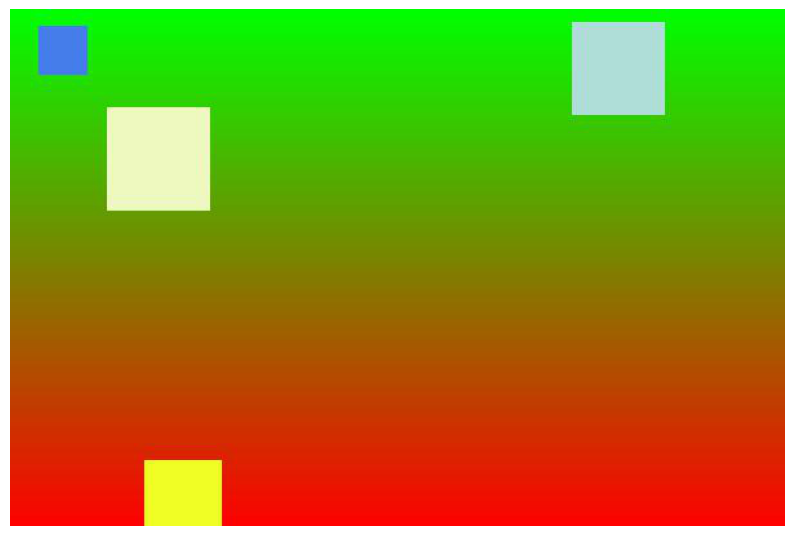

#### Context Used:

```
Section: Product Showcase
Caption: Photo 3: New product collection
Context: Our latest product lineup is displayed below.
```

#### Generated Captions:

- **Short Caption** (0.95 confidence): *brief caption for this image. context : section : product showcase caption : photo 3 : new product collection context : our latest product lineup is displayed below.*

- **Detailed Caption** (0.59 confidence): *detailed description of this image. context : section : product showcase caption : photo 3 : new product collection context : our latest product lineup is displayed below.*

Saved annotated image to: Jupyter Notebook/yavar/output_folder\annotated_sample_5.jpg
Saved captions to: Jupyter Notebook/yavar/output_folder\captions_sample_5.json

✅ All processing complete!


In [17]:
# ——— Imports ———
import os
import json
from PIL import Image, ImageDraw, ImageFont
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# ——— Configuration ———
img_folder = "Jupyter Notebook/yavar/img_folder"
metadata_folder = "Jupyter Notebook/yavar/metadata_folder"
output_folder = "Jupyter Notebook/yavar/output_folder"
os.makedirs(output_folder, exist_ok=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# ——— Load BLIP Model ———
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# ——— Display Function ———
def display_results(image_path, short_cap, detailed_cap, short_conf, detailed_conf, context):
    """Display results in Jupyter notebook with formatting"""
    display(Markdown(f"### Results for {os.path.basename(image_path)}"))
    
    # Show image
    plt.figure(figsize=(10, 8))
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Show metadata context
    display(Markdown("#### Context Used:"))
    display(Markdown(f"```\n{context}\n```"))
    
    # Show captions with confidence scores
    display(Markdown("#### Generated Captions:"))
    display(Markdown(f"- **Short Caption** ({short_conf:.2f} confidence): *{short_cap}*"))
    display(Markdown(f"- **Detailed Caption** ({detailed_conf:.2f} confidence): *{detailed_cap}*"))
    
    # Confidence indicators
    if short_conf < 0.5 or detailed_conf < 0.5:
        display(Markdown("⚠️ **Warning:** Low confidence in one or more captions"))

# ——— Updated Caption Generation ———
def generate_caption(img, prompt, max_len=32):
    try:
        # Process image and text separately with proper truncation
        inputs = processor(
            images=img,
            text=prompt,
            return_tensors="pt",
            padding="max_length",
            max_length=200,  # Increased from 77 (BLIP's default)
            truncation=True
        ).to(device)
        
        # Generate with adjusted parameters
        out = model.generate(
            **inputs,
            max_new_tokens=max_len,
            num_beams=3,
            early_stopping=True,
            return_dict_in_generate=True,
            output_scores=True
        )
        
        text = processor.decode(out.sequences[0], skip_special_tokens=True).strip()
        scores = torch.stack(out.scores, dim=1).max(-1).values
        confidence = float(scores.mean().exp().item())
        return text, confidence
    
    except Exception as e:
        print(f"Error generating caption: {str(e)}")
        return "Caption generation failed", 0.0

# ——— Processing Loop ———
for filename in sorted(os.listdir(img_folder)):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        try:
            image_path = os.path.join(img_folder, filename)
            meta_path = os.path.join(metadata_folder, os.path.splitext(filename)[0] + ".txt")
            
            print(f"\n{'='*50}\nProcessing: {filename}\n{'='*50}")

            # Load image and metadata
            img = Image.open(image_path).convert("RGB")
            with open(meta_path, "r") as f:
                metadata = json.load(f)

            # Create focused context
            context = (
                f"Section: {metadata.get('section_header', 'N/A')[:100]}\n"
                f"Caption: {metadata.get('caption', 'N/A')[:100]}\n"
                f"Context: {metadata.get('above_text', metadata.get('below_text', 'N/A'))[:100]}"
            )

            # Generate captions
            short_cap, short_conf = generate_caption(
                img, 
                f"Brief caption for this image. Context: {context}",
                max_len=20
            )
            
            detailed_cap, detailed_conf = generate_caption(
                img,
                f"Detailed description of this image. Context: {context}",
                max_len=64
            )

            # Display in notebook
            display_results(image_path, short_cap, detailed_cap, short_conf, detailed_conf, context)

            # Save annotated image
            annotated_img = img.copy()
            draw = ImageDraw.Draw(annotated_img)
            try:
                font = ImageFont.truetype("arial.ttf", size=20)
            except:
                font = ImageFont.load_default()
            
            # Add captions to image
            draw.text((10, 10), f"{short_cap} ({short_conf:.2f})", fill="blue", font=font)
            draw.text((10, 40), f"{detailed_cap} ({detailed_conf:.2f})", fill="red", font=font)
            
            out_img_path = os.path.join(output_folder, f"annotated_{filename}")
            annotated_img.save(out_img_path)
            print(f"Saved annotated image to: {out_img_path}")

            # Save JSON
            caption_data = {
                "filename": filename,
                "short_caption": short_cap,
                "short_confidence": short_conf,
                "detailed_caption": detailed_cap,
                "detailed_confidence": detailed_conf,
                "context_used": context,
                "metadata": metadata
            }
            
            json_path = os.path.join(output_folder, f"captions_{os.path.splitext(filename)[0]}.json")
            with open(json_path, "w") as f:
                json.dump(caption_data, f, indent=2)
            print(f"Saved captions to: {json_path}")
            
        except Exception as e:
            print(f"❌ Error processing {filename}: {str(e)}")
            continue

print("\n✅ All processing complete!")